In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [3]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
sam_sub=pd.read_csv('data/sample_submission.csv')

In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X=train.drop('label',axis=1)
y=train['label']

In [8]:
X.shape,test.shape

((42000, 784), (28000, 784))

In [9]:
X,test=X.values.reshape(-1,28,28),test.values.reshape(-1,28,28)

In [10]:
X.shape,test.shape

((42000, 28, 28), (28000, 28, 28))

In [11]:
X[0].shape

(28, 28)

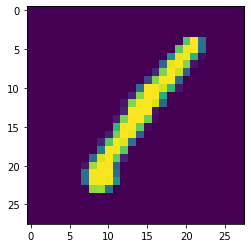

In [12]:
plt.imshow(X[0])

In [13]:
print(X[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [14]:
X,test=X/255,test/255
print(X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

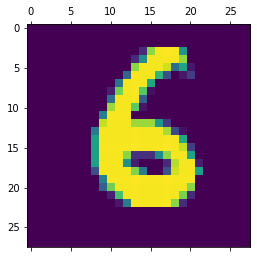

In [42]:
plt.matshow(X[0])

In [16]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.4,random_state=21)

In [47]:
X_val.shape

(10080, 28, 28)

In [49]:
X_train.shape

(15120, 28, 28)

## Simple Multi-layer Model

In [50]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X,y,epochs=10,validation_data=(X_train,y_train))

Train on 25200 samples, validate on 15120 samples
Epoch 1/10
25200/25200 [==============================] - 1s 56us/sample - loss: 0.3690 - accuracy: 0.8921 - val_loss: 0.1773 - val_accuracy: 0.9478
Epoch 2/10
25200/25200 [==============================] - 1s 57us/sample - loss: 0.1598 - accuracy: 0.9527 - val_loss: 0.1156 - val_accuracy: 0.9650
Epoch 3/10
25200/25200 [==============================] - 1s 51us/sample - loss: 0.1085 - accuracy: 0.9657 - val_loss: 0.0775 - val_accuracy: 0.9778
Epoch 4/10
25200/25200 [==============================] - 1s 54us/sample - loss: 0.0813 - accuracy: 0.9745 - val_loss: 0.0572 - val_accuracy: 0.9821
Epoch 5/10
25200/25200 [==============================] - 2s 76us/sample - loss: 0.0646 - accuracy: 0.9794 - val_loss: 0.0462 - val_accuracy: 0.9870
Epoch 6/10
25200/25200 [==============================] - 1s 55us/sample - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0347 - val_accuracy: 0.9896
Epoch 7/10
25200/25200 [==============================] 

In [67]:
train_pred = model.predict_classes(X_train)
val_pred = model.predict_classes(X_val)
test_pred = model.predict_classes(test)

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

accuracy_score_train = accuracy_score(y_train, train_pred)
accuracy_score_val = accuracy_score(y_val, val_pred)



print("Train Accuracy: ",accuracy_score_train)

print("-----------------------")

print("Val Accuracy: ",accuracy_score_val)


Train Accuracy:  0.9974206349206349
-----------------------
Val Accuracy:  0.9976190476190476


In [73]:
val_pred[1]

0

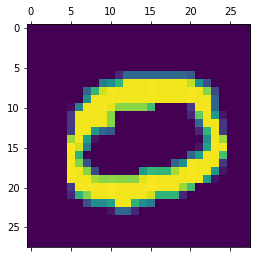

In [72]:
plt.matshow(test[1])

In [74]:
submission=pd.DataFrame({'ImageId':imgid,'Label':test_pred})
submission.to_csv('submission.csv',index=False)

In [76]:
submission = pd.read_csv("submission.csv")
print(submission.shape)

(28000, 2)


In [77]:
sam_sub.shape

(28000, 2)

## Final Model

In [21]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X,y,epochs=100,validation_data=(X_val,y_val))

Train on 25200 samples, validate on 16800 samples
Epoch 1/100
25200/25200 [==============================] - 2s 92us/sample - loss: 0.8218 - accuracy: 0.7360 - val_loss: 0.2740 - val_accuracy: 0.9259
Epoch 2/100
25200/25200 [==============================] - 3s 114us/sample - loss: 0.2840 - accuracy: 0.9186 - val_loss: 0.2000 - val_accuracy: 0.9436
Epoch 3/100
25200/25200 [==============================] - 2s 75us/sample - loss: 0.2128 - accuracy: 0.9387 - val_loss: 0.1924 - val_accuracy: 0.9460
Epoch 4/100
25200/25200 [==============================] - 2s 75us/sample - loss: 0.1801 - accuracy: 0.9485 - val_loss: 0.1579 - val_accuracy: 0.9565
Epoch 5/100
25200/25200 [==============================] - 2s 74us/sample - loss: 0.1548 - accuracy: 0.9547 - val_loss: 0.1545 - val_accuracy: 0.9585
Epoch 6/100
25200/25200 [==============================] - 2s 72us/sample - loss: 0.1339 - accuracy: 0.9604 - val_loss: 0.1435 - val_accuracy: 0.9627
Epoch 7/100
25200/25200 [========================

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_5 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 12)               

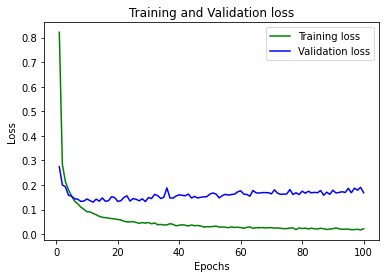

In [24]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,101)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

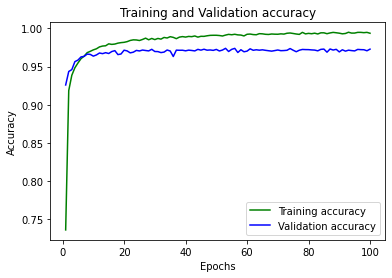

In [25]:
loss_train=history.history['accuracy']
loss_val=history.history['val_accuracy']
epochs=range(1,101)
plt.plot(epochs,loss_train,'g',label='Training accuracy')
plt.plot(epochs,loss_val,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
sam_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [33]:
sam_sub.shape

(28000, 2)

In [34]:
test.shape

(28000, 28, 28)

In [35]:
Label=model.predict(test)

In [36]:
Label[0]

array([3.0284680e-19, 1.8426173e-15, 1.0000000e+00, 1.7429221e-11,
       3.1089142e-15, 1.3210111e-21, 2.4598240e-14, 8.1149931e-12,
       1.7839904e-17, 2.4281649e-20], dtype=float32)

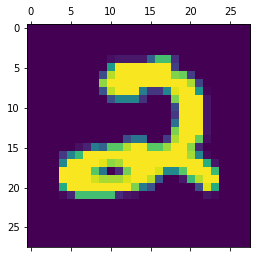

In [37]:
plt.matshow(test[0])

In [38]:
np.argmax(Label[0])

2

In [39]:
Label=[np.argmax(i) for i in Label]
Label[:10]

[2, 0, 9, 4, 3, 7, 0, 3, 0, 3]

In [40]:
imgid=range(1,len(Label)+1)

In [41]:
submission=pd.DataFrame({'ImageId':imgid,'Label':Label})
submission.to_csv('submission.csv',index=False)